<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the difference between a discriminator and generator in a GAN
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [39]:
import numpy as np

In [42]:
from tensorflow.keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000,
                                                         skip_top=0,
                                                         maxlen=100,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [43]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [44]:
max_features = 1000
batch_size = 32
max_len = 100

In [45]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [46]:
x_train

array([[  0,   0,   0, ..., 236,  17,  12],
       [  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 261,  17,  12],
       ...,
       [  0,   0,   0, ..., 450,  17,  12],
       [  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ...,  81,  17,  12]], dtype=int32)

In [47]:
y_test

array([ 4,  4, 10, ...,  3,  4,  3])

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          verbose=2,
          epochs=5, 
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

Train on 4777 samples, validate on 1195 samples
Epoch 1/5
 - 52s - loss: -8.3728e+01 - acc: 0.0304 - val_loss: -9.4173e+01 - val_acc: 0.0293
Epoch 2/5
 - 48s - loss: -9.6635e+01 - acc: 0.0304 - val_loss: -9.4173e+01 - val_acc: 0.0293
Epoch 3/5
 - 48s - loss: -9.6635e+01 - acc: 0.0304 - val_loss: -9.4173e+01 - val_acc: 0.0293
Epoch 4/5
 - 49s - loss: -9.6635e+01 - acc: 0.0304 - val_loss: -9.4173e+01 - val_acc: 0.0293
Epoch 5/5
 - 48s - loss: -9.6635e+01 - acc: 0.0304 - val_loss: -9.4173e+01 - val_acc: 0.0293
1195/1195 [==============================] - 2s 1ms/step
Test score: -94.1734721291514
Test accuracy: 0.029288702953809476


Conclusion - RNN runs, and gives pretty decent improvement over a naive model. To *really* improve the model, more playing with parameters would help. Also - RNN may well not be the best approach here, but it is at least a valid one.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [50]:
!pip install google_images_download

You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [87]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 10, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
URLError on an image...trying next one... Error: HTTP Error 503: Service Temporarily Unavailable
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 4.PKLS4116.png
Image URL: https://i.pinimg.com/originals/57/5c/5b/575c5b5c441e27ff04eb50571ee30127.jpg
Completed Image ====> 5.575c5b5c441e27ff04eb50571ee30127.jpg
Image URL: https://cdn.pixabay.com/photo/2018/04/11/23/05/frog-331203

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [96]:
absolute_image_paths = absolute_image_paths[0]['animal pond']

In [97]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def img_contains(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=1)
    classification = results[0][0][1]
    return classification

We didn't find a frog...


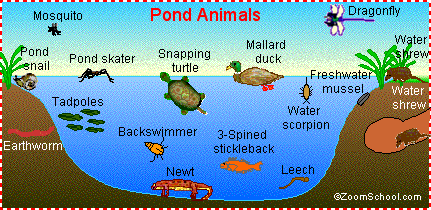

We didn't find a frog...


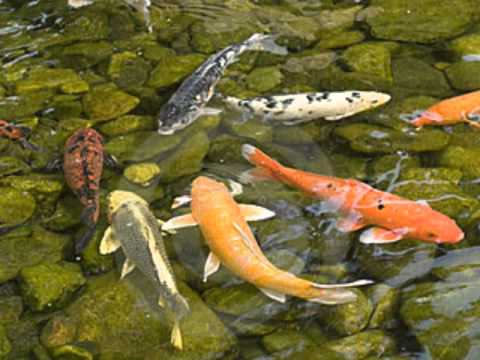

We didn't find a frog...


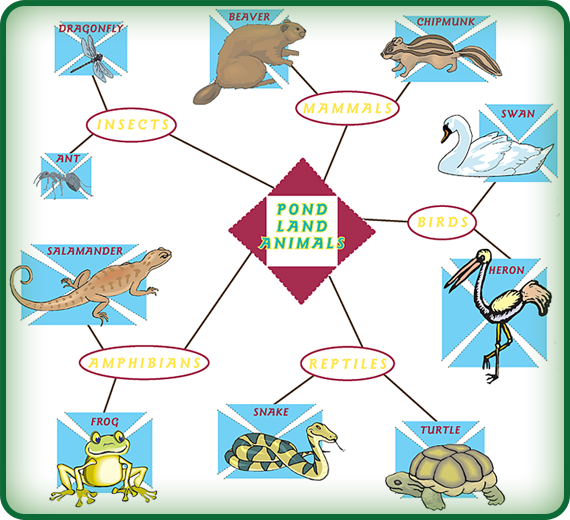

We didn't find a frog...


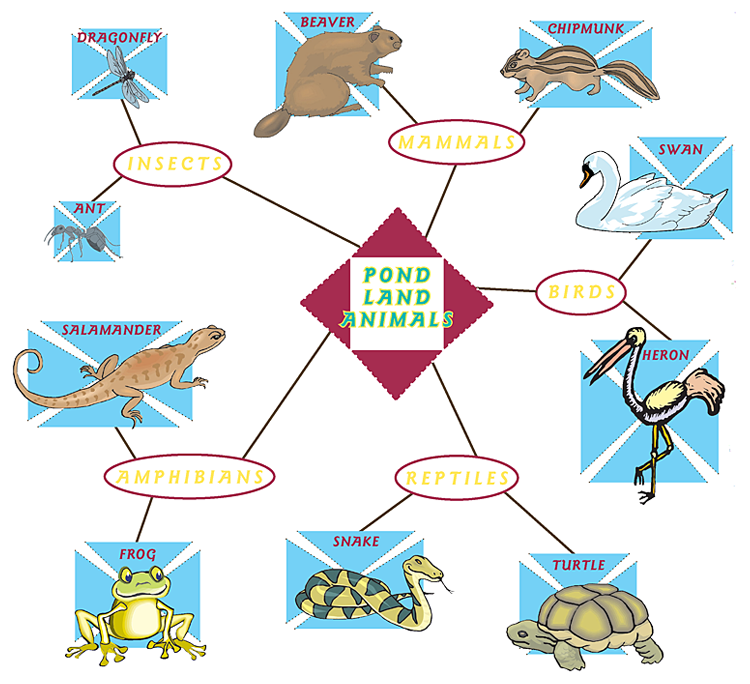

We didn't find a frog...


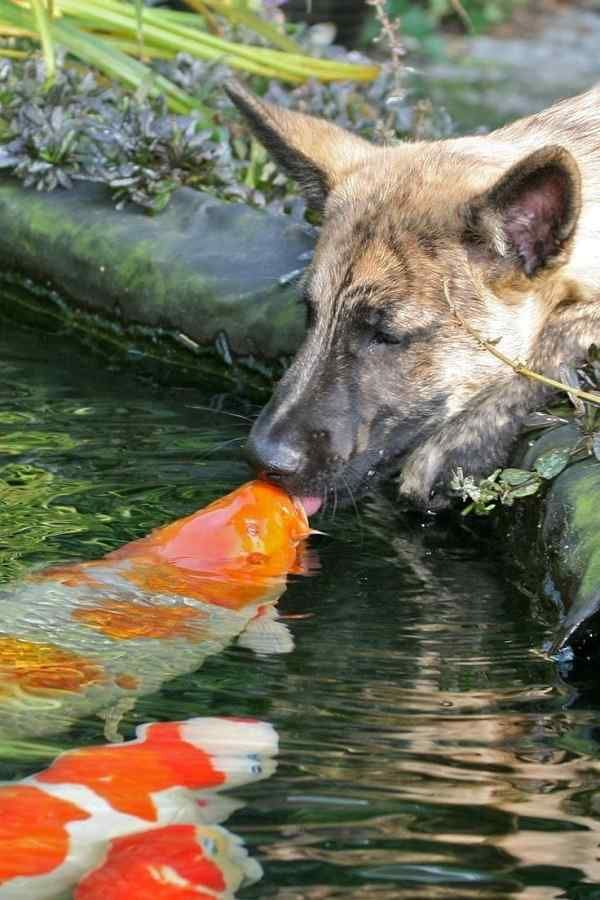

We didn't find a frog...


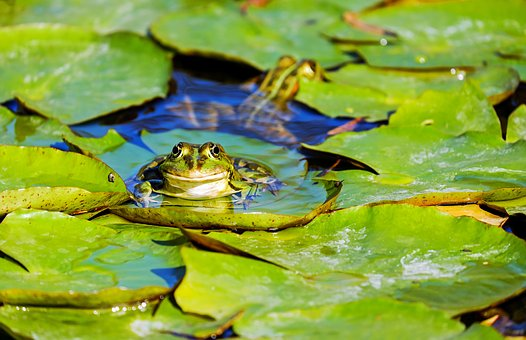

We didn't find a frog...


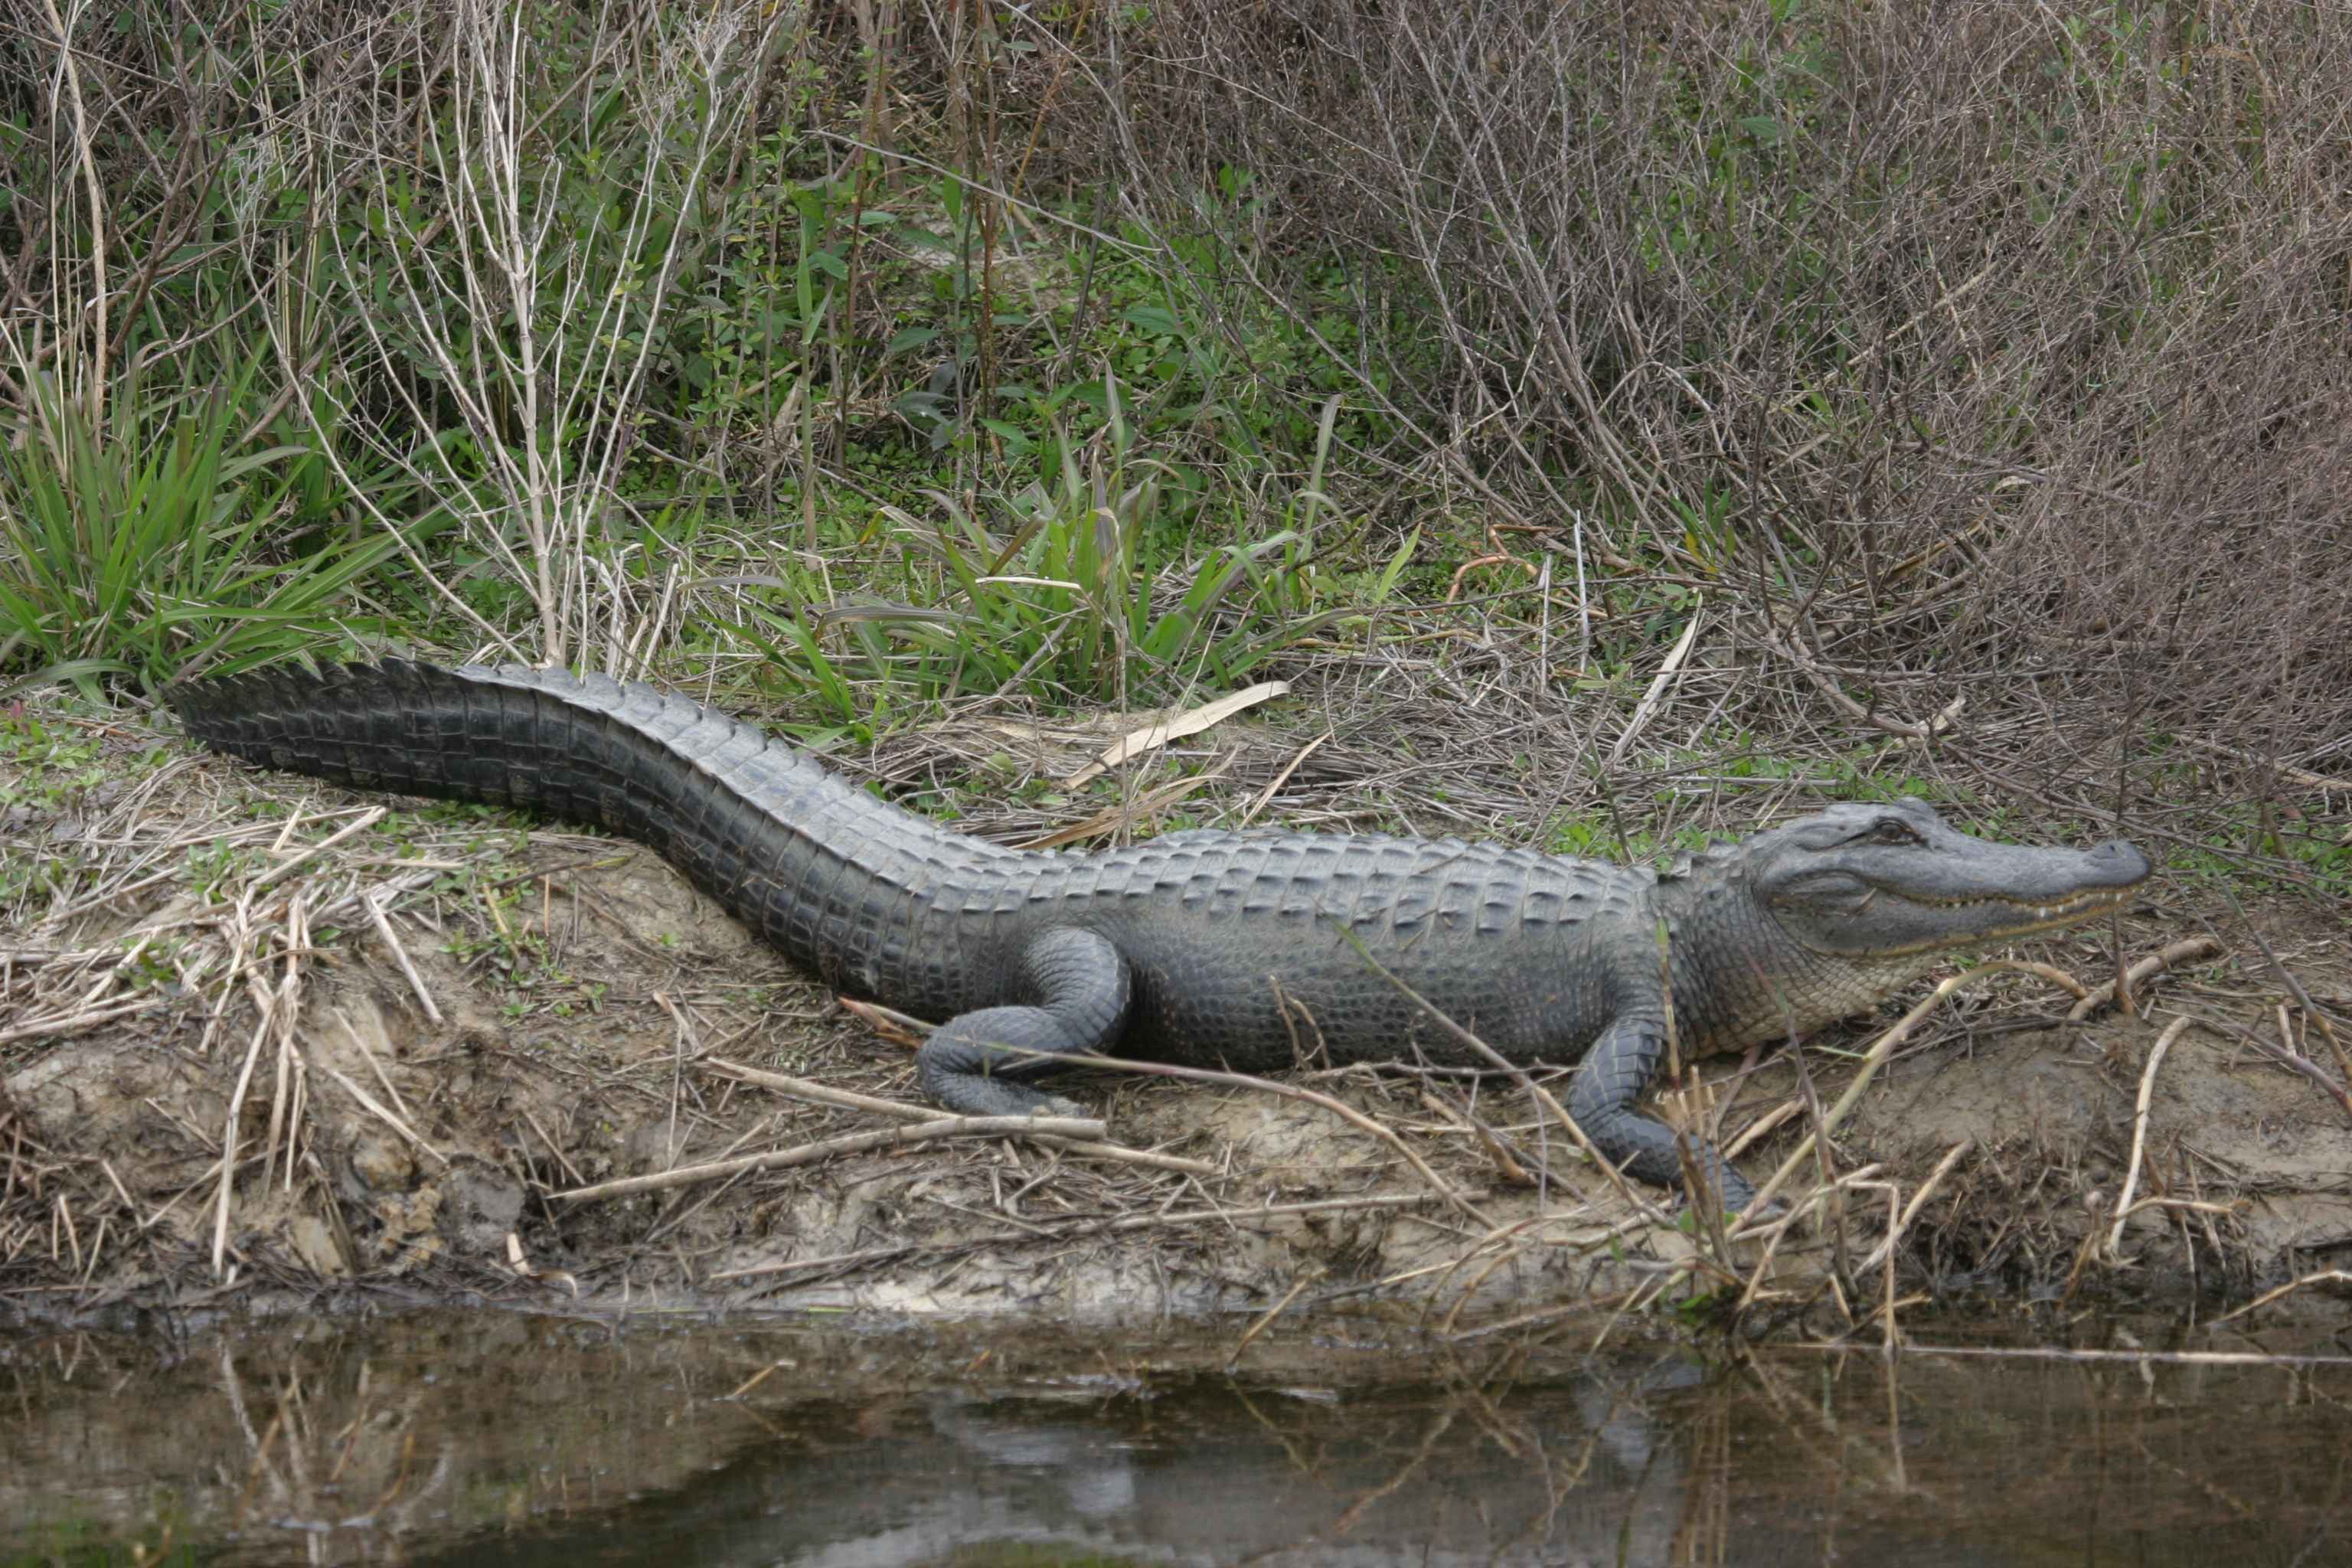

We didn't find a frog...


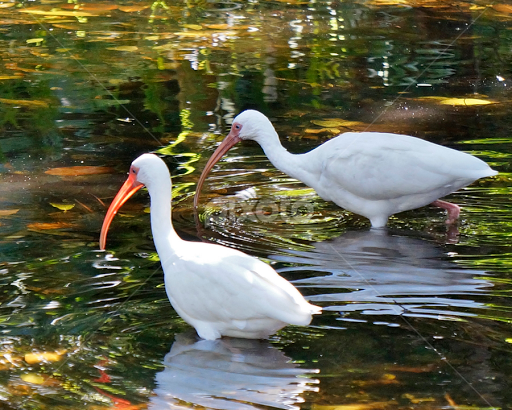

We Found a Frog!


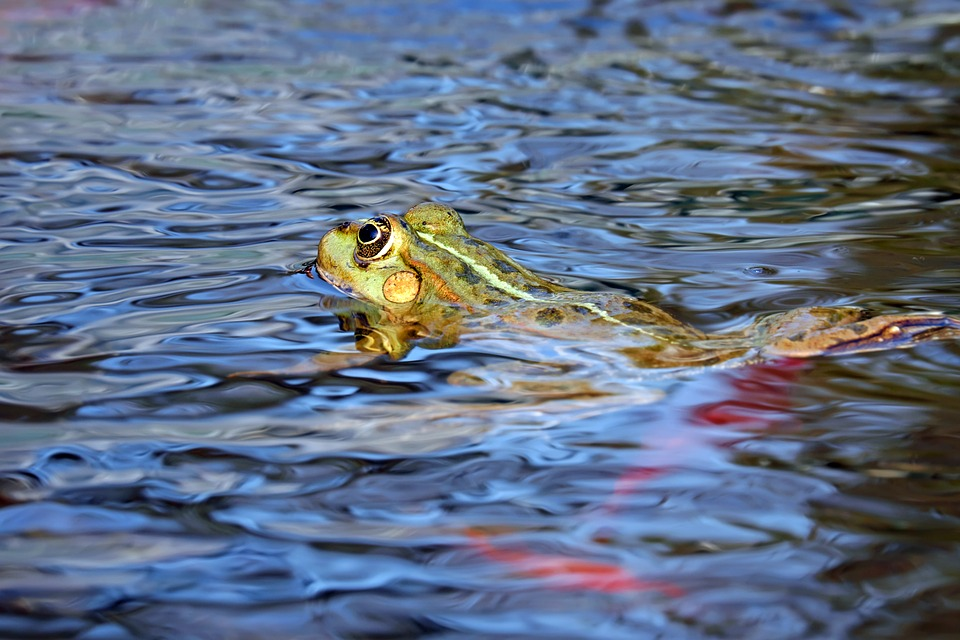

We didn't find a frog...


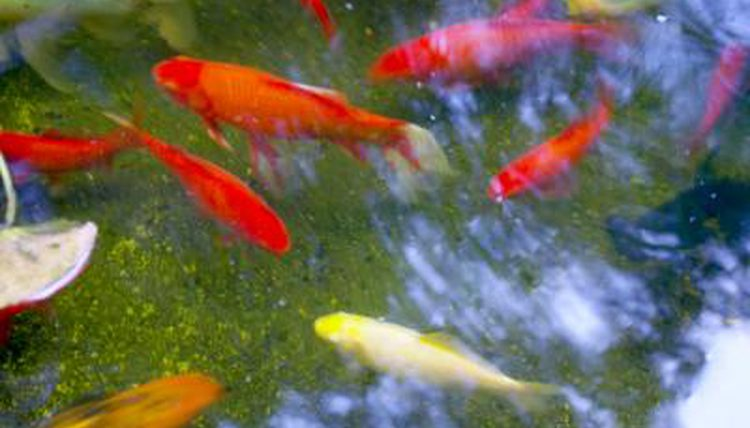

In [98]:
from IPython.display import Image, display

for path in absolute_image_paths:
    classification = img_contains(process_img_path(path))
    if 'frog' in classification:
        print('We Found a Frog!')
        display(Image(filename=path, width=600))
    else:
        print('We didn\'t find a frog...')
        display(Image(filename=path, width=600))

<a id="p3"></a>
## Part 3 - Generative Adverserial Networks (GANS)

Describe the difference between a discriminator and generator in a GAN in your own words.

**Generators** seeks to fool the discriminator into believing that a randomly generated fake observation is in fact a real observation. The objective of the generator is to optimize the discriminator to 0% accuracy.

**Discriminators** seek to determine whether an observation is real or fake. The objective of the discriminator is to optimize toward 100% accuracy.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

What do you consider your strongest area, as a Data Scientist?

- I believe my strongest area is applying data science to business opportunities. Given my background and basic technical understanding of data science I feel I have a strong grasp of how a data science opportunity will manifest it self.

What area of Data Science would you most like to learn more about, and why?

- I want to learn more about generative adversarial networks and autoencoders as I think synthesizing data is critical to truly unlocking the potential of deep learning. There are too many fields where collecting enough data is cost prohibitive or politically frowned upon.

Where do you think Data Science will be in 5 years?

- I think it will be heavily focused on data generation and preparation (including accounting for bias). Further, I expect tools to evaluate ML and DL algorithms to improve considerably. 

What are the threats posed by AI to our society?

- There are much hyped threats such as automation, or AGI killing us all. I think the true threats are more likely to be how AI has the potential to enable centralized groups of people to control and monitor vast numbers of people. Further, there are real risks around AI being used by bad actors to further pollute news and political coverage. 

How do you think we can counteract those threats?

- I think one primary path is making AI technologies more accesible and understood. In that scenario, people will be more adept at understanding what AI can and cannot do. Moreover, I think people as a whole need to become more thoughtful about in what ways they invite AI into their lives.

Do you think achieving General Artifical Intelligence is ever possible?

- Theoretically yes, but I view it as more likely that human thinking will merge with machine thinking. I do not think general artificial intelligence will be possible in the next 20 years.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [99]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")